<a href="https://colab.research.google.com/github/harshh-2/AQI_Predictor/blob/main/aqi_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [48]:
#loading csv file
aqi_data = pd.read_csv('/content/city_day.csv' , sep=',')

#Cleaning dataset

aqi_data['Date']= pd.to_datetime(aqi_data['Date'])


aqi_data=aqi_data.drop(columns=['Xylene','Benzene','Toluene','NH3'], errors='ignore')
#not needed col dropped

aqi_data = aqi_data.dropna(subset=['PM2.5', 'PM10'], how='all') #srop na values in pm2.5 n 10

cols_to_fix = ['PM2.5','PM10','NO2','NH3','CO','SO2','O3','AQI','NO','NOx']

for col in cols_to_fix:
  if col in aqi_data.columns:
    aqi_data[col]=aqi_data[col].fillna(aqi_data[col].median())    #filling NA w median values

aqi_data =aqi_data.dropna()
aqi_data = aqi_data[aqi_data['City'] == 'Jaipur'].copy()



In [49]:
X = aqi_data.drop(columns=['AQI', 'AQI_Bucket', 'City', 'Date'], errors='ignore')
Y = aqi_data['AQI']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))



Mean Absolute Error: 14.22392694063927
Mean Squared Error: 464.78633059360715
R2 Score: 0.8734120543731935


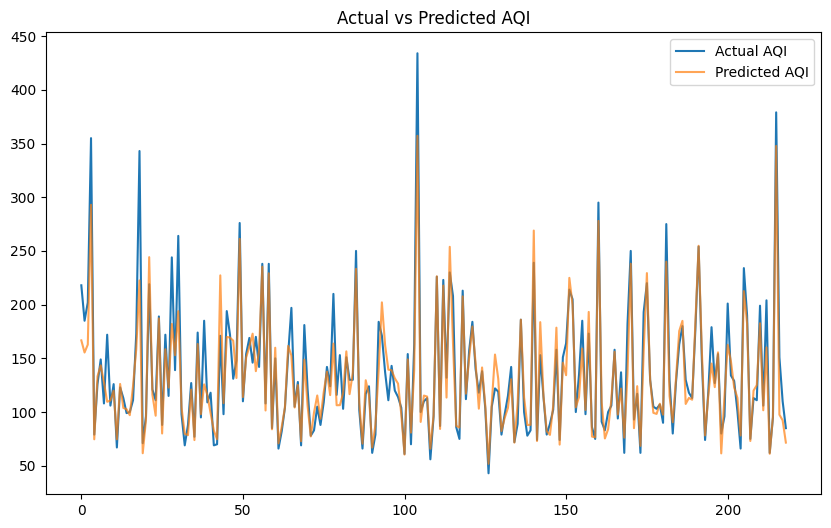

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual AQI')
plt.plot(y_pred, label='Predicted AQI', alpha=0.7)
plt.title('Actual vs Predicted AQI')
plt.legend()
plt.show()